# MECH 309: Assignment 3, Question 1

_Cagri Arslan_

February 8, 2025

*All work can be found on https://github.com/imported-canuck/MECH-309*

In [13]:
# Imports
import numpy as np

### a)

The 1-norm of a vector is the sum of the absolute values of all its entries.      

The $\infty$-norm of a vector is the entry with the largest absolute value.  

The induced 1-norm of a matrix is the greatest absolute column-sum of it.

Python functions to compute these are below:

In [14]:
def one_norm_vector(x):
    '''
    Computes the 1-norm of a column vector x

    Inputs:
        x (nparray): An (n, 1) vector

    Returns:
        1-norm: The 1-norm of x 
    '''
    norm = float(np.sum(np.abs(x)))

    return norm


In [15]:
def inf_norm_vector(x):
    '''
    Computes the infinity-norm of a column vector x

    Inputs:
        x (nparray): An (n, 1) vector

    Returns:
        norm: The infinity-norm of x 
    '''
    norm = float(np.max(np.abs(x)))

    return norm

In [16]:
def one_norm_matrix(A):
    '''
    Comutes the induced 1-norm of a matrix A

    Inputs:
        A (nparray): An (n, m) matrix
    
    Returns: 
        norm: The induced 1-norm of A
    '''
    
    num_columns = A.shape[1]

    norm = 0.0

    for j in range(num_columns):
        column_sum = one_norm_vector(A[:, j])
        if column_sum > norm:
            norm = column_sum

    return norm

We validate these functions on a randomly generated vector $\bold{x}$ and a randomly generated matrix $\bold{A}$ below:

In [ ]:
# Verify vector and matrix norms:

# Randomly generate a vector and a matrix (6,1) and (4,5) respectively
x = np.random.rand(6, 1)
A = np.random.rand(4, 5)

# Compute norms using our functions
x_one_norm = one_norm_vector(x)
x_inf_norm = inf_norm_vector(x)
A_one_norm = one_norm_matrix(A)

# Compute norms using NumPy built-ins
x_one_norm_ref = np.linalg.norm(x, ord=1)
x_inf_norm_ref = np.linalg.norm(x, ord=np.inf)
A_one_norm_ref = np.linalg.norm(A, ord=1)

# Report results
print("\nVector x (6,1):")
print(f"  1-norm:      Custom = {x_one_norm:.10f}, NumPy = {x_one_norm_ref:.10f}")
print(f"  Match: {np.isclose(x_one_norm, x_one_norm_ref)}")
print(f"\n  ∞-norm:      Custom = {x_inf_norm:.10f}, NumPy = {x_inf_norm_ref:.10f}")
print(f"  Match: {np.isclose(x_inf_norm, x_inf_norm_ref)}")

print(f"\nMatrix A (4,5):")
print(f"  1-norm:      Custom = {A_one_norm:.10f}, NumPy = {A_one_norm_ref:.10f}")
print(f"  Match: {np.isclose(A_one_norm, A_one_norm_ref)}")


Vector x (6,1):
  1-norm:      Custom = 3.7057842905, NumPy = 3.7057842905
  Match: True

  ∞-norm:      Custom = 0.8719027197, NumPy = 0.8719027197
  Match: True

Matrix A (4,5):
  1-norm:      Custom = 2.8624664964, NumPy = 2.8624664964
  Match: True


### b)

The code below implements Hager's algorithm to approximate $\lVert \bold{A} \rVert$  

*Note:* The `np.sign()` function slightly differs from the `sign(y)` function in the problem statement: If an element of the input vector to `np.sign()` is equal to 0, `np.sign()` inputs 0 into the position of the sign vector. However, in this case, the `sign(y)` function in the problem statement would input 1 into the position of the sign vector. I call `np.sign()` in this implementation.

In [39]:
def hager(A, epsilon=1e-6):
    '''
    Estimates the 1-norm of a matrix A using Hager's method

    Inputs:
        A (nparray): An (n, n) square, full-rank matrix
        epsilon (float): A small tolerance value

    Returns:
        est_norm: An estimate of the 1-norm of A
    ''' 
    n = A.shape[0]
    if A.shape[1] != n:
        raise ValueError("Input matrix A must be square.")

    x = np.ones((n, 1)) / n
    flag = True

    while flag:
        y = A @ x
        zeta = np.sign(y)
        z = A.T @ zeta

        if inf_norm_vector(z) <= z.T @ x + epsilon:
            flag = False
        
        else: 
            r = np.argmax(np.abs(z))
            x = np.zeros((n, 1))
            x[r,0] = 1.0
    
    return one_norm_vector(y)


Now we compare Hager's algorithm's estimate of $\lVert \bold{A} \rVert$ to the $\lVert \bold{A} \rVert$ computed through NumPy's `np.linalg.norm` function. $\lVert \bold{A} \rVert$ relative error of 9.632% is realized. As mentioned in the problem statement, the Hager estimation of the 1-norm of $\lVert \bold{A} \rVert$ (around 78.97) is less than the true 1-norm of $\lVert \bold{A} \rVert$ (around 87.39).

In [45]:
# Import A matrix from csv
A = np.loadtxt("matrix_a.csv", delimiter=",")

est_norm = float(hager(A))                 # cast in case it's a (1,1) array
true_norm = float(np.linalg.norm(A, ord=1))

abs_err = abs(est_norm - true_norm)
rel_err = abs_err / true_norm if true_norm != 0 else np.nan
ratio   = est_norm / true_norm if true_norm != 0 else np.nan

print("Induced 1-norm of A")
print("-" * 40)
print(f"Hager estimate     : {est_norm:12.6f}")
print(f"True norm (NumPy)  : {true_norm:12.6f}")
print(f"Absolute error     : {abs_err:12.6f}")
print(f"Relative error     : {100*rel_err:11.3f}%")

Induced 1-norm of A
----------------------------------------
Hager estimate     :    78.969677
True norm (NumPy)  :    87.387192
Absolute error     :     8.417515
Relative error     :       9.632%


### c)

A plot of $f(x)$ for $x \in [0, 5]$ is found below.

In [21]:
# Evaluate ``f(x)`` using ``x`` defined above.
f_x = f(x)

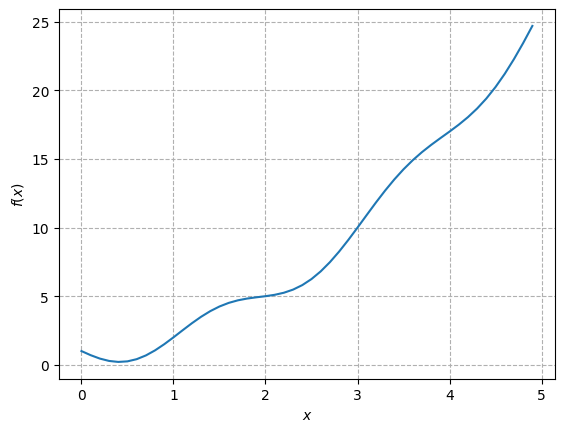

In [22]:
# Plot function for 1c)
fig, ax = plt.subplots()
ax.plot(x, f_x)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.grid(linestyle='--')

The figure above shows that $\Delta x = 1$ is not an
appropriate step size for $f(x)$, as it is too large. The
derivative near zero should be negative, but since the step
size is too large, it is incorrectly approximated as positive.
In this case, a good rule of thumb would be to pick $\Delta x$
to be significantly smaller than the period of $\sin(\pi x)$.


## Question 2

### a)

The eigenvalues of $\mathbf{A}$ are
\begin{align}
    \lambda_0
    &=
    -0.25 +j 0.19364917,
    \\
    \lambda_1
    &=
    -0.25 -j 0.19364917,
\end{align}
as computed with `scipy.linalg.eigvals()`. They are plotted below.


In [23]:
# Compute eigenvalues
A = np.array([
    [0, 1],
    [-0.1, -0.5],
])
eigv = scipy.linalg.eigvals(A)
print(eigv)

[-0.25+0.19364917j -0.25-0.19364917j]


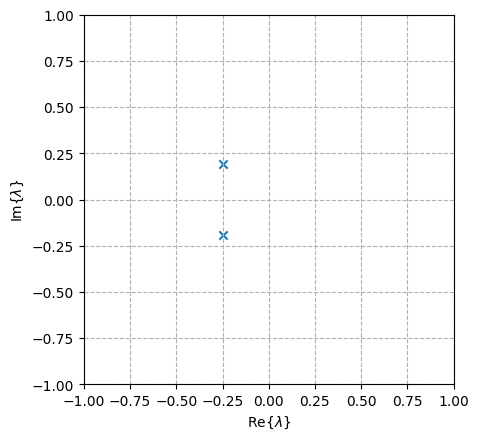

In [24]:
# Plot eigenvalues
fig, ax = plt.subplots()
ax.scatter(np.real(eigv), np.imag(eigv), marker='x')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # Force axis aspect ratio to be equal
ax.set_xlabel(r'$\mathrm{Re}\{\lambda\}$')
ax.set_ylabel(r'$\mathrm{Im}\{\lambda\}$')
ax.grid(linestyle='--')

### b)

The ODE is asymptotically stable because its eigenvalues are in the open left half-plane. In other words, their real parts are strictly negative.

### c)

The numerically integrated trajectory for $\mathbf{x}_0 = \begin{bmatrix}1 & 1 \end{bmatrix}^\mathsf{T}$ 

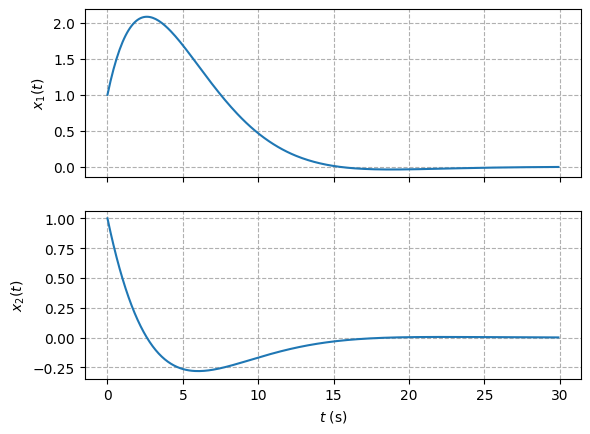

In [25]:
def ivp(t, x):
    """Evaluate ``x_dot`` in (2)."""
    x_dot = A @ x.reshape((-1, 1))
    return x_dot.ravel()

# Solve initial value problem defined in ``ivp``
t_span = (0, 30)
t_step = 1e-1
t = np.arange(*t_span, t_step)
x0 = np.array([1, 1])
sol = scipy.integrate.solve_ivp(
    ivp,
    t_span=t_span,
    y0=x0,
    method='RK45',
    t_eval=t,
)

# Plot trajectory
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, sol.y[0, :])
ax[1].plot(t, sol.y[1, :])
ax[1].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x_1(t)$')
ax[1].set_ylabel(r'$x_2(t)$')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')